<a href="https://colab.research.google.com/github/Shimamoto0000/Deep-Learning2022Late/blob/main/CNN%2BTrain_example2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 学習モデルのライブラリを読み込む

In [2]:
from keras.models import Sequential, Model
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dense

### SVG画像表示用のライブラリを読み込む

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from IPython.display import SVG
from keras.utils import model_to_dot

## 学習モデルを生成する

In [4]:
import numpy as np
import keras.callbacks as callbacks
import keras 


x_train = np.random.random((100, 6, 6, 1))

y_train = keras.utils.to_categorical(np.random.randint(10,size=(100, 1)),
                                     num_classes= 10)



In [5]:
x_test = np.random.random((20, 6, 6, 1))

y_test = keras.utils.to_categorical(np.random.randint(10,size=(20,1)),
                                    num_classes = 10)

In [6]:
# 畳み込み層を追加

model = Sequential()
model.add(  Conv2D( 
    filters=3, # フィルター3パターン
    kernel_size=(3,3), # 受容野縦3横3
    kernel_initializer="lecun_uniform",
    input_shape=(6,6,1), # 入力画像の1個分 縦3, 横3
    padding='same', # ゼロパディング
    name='Conv2D_1'
 )  )

In [7]:
#全結合層
model.add(Flatten(name = "Flatten1"))
#softmaxで分類するニューロン
model.add(Dense(units=10, activation = "softmax", name = "Dense_1"))

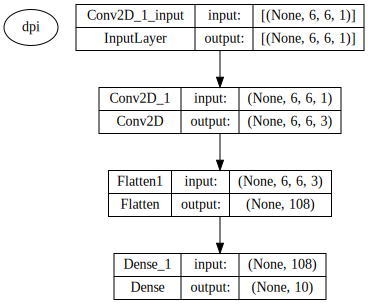

In [8]:
#組み立てた学習モデルの構成をSVG画像をして表示
SVG(model_to_dot(model,
                 show_shapes = True, dpi = None,
                 ).create(prog = "dot", format = "svg") )

In [13]:
earlyStopping = callbacks.EarlyStopping(monitor="val_loss", patience = 5)

In [16]:
loss_fn = keras.losses.SparseCategoricalCrossentropy()
model.compile(loss = "mean_squared_error",
              optimizer='sgd')

In [20]:
model.fit(x_train, 
          y_train,
          batch_size = 32, 
          epochs = 1000,
          callbacks = [earlyStopping],
          validation_split = 0.2)

Epoch 1/1000
3/3 [==============================] - 0s 41ms/step - loss: 0.0926 - val_loss: 0.0942
Epoch 2/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0926 - val_loss: 0.0942
Epoch 3/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.0926 - val_loss: 0.0942
Epoch 4/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0926 - val_loss: 0.0942
Epoch 5/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.0926 - val_loss: 0.0942
Epoch 6/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0926 - val_loss: 0.0941
Epoch 7/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.0926 - val_loss: 0.0941
Epoch 8/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.0926 - val_loss: 0.0941
Epoch 9/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.0925 - val_loss: 0.0941
Epoch 10/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.0925 - val_loss: 0.0941
Epoch 11/